# Fortune 500 data in 2017
data set overview:

-  `company` - The Name of the company.
-  `rank` - The Global 500 rank for the company.
-  `revenues` - The company's total revenues for the fiscal year, in millions of dollars (USD).
-  `revenue_change` - The percentage change in revenue between the current and prior fiscal years.
-  `profits` - Net income for the fiscal year, in millions of dollars (USD).
-  `assets`
-  `profit change`
-  `ceo` - The company's Chief Executive Officer.
-  `industry` - The industry in which the company operates.
-  `sector` - The sector in which the company operates.
-  `previous_rank` - The Global 500 rank for the company for the prior year.
-  `country` - The Country in which the company is headquartered.
-  `hq_location` - The City and Country, (or City and State for the USA) where the company is headquarted.
-  `website`
-  `years_on_global_500_list`
-  `employees` - Total employees (full-time equivalent, if available) at fiscal year-end.
-  `total_stockholder_equity`

***

# Pandas file reading

-  __function   pandas.read_csv(filename, index_col=#)__<br>
 The index_col parameter specifies which column to use as the row labels. We use a value of 0 to specify that we want to use the first column.<br> Without the index_bol parameter, the first column will be an integer column and the index labels will be the second column.
 

In [32]:
import pandas as pd
f500 = pd.read_csv('f500.csv')                # pd.read_csv()   index_col=0 makes the first column only as index column, instead of first column
# f500.index.name = 'company' or 'None'       # pd.index.name   the names of index and columns can be changed
f500_type = type(f500)                        # type: DataFrame or pandas.core.frame.DataFrame
f500_shape = f500.shape                       # (500,16)  a tuple, is not callable, so .shape not .shape()
print(f500.head(6))                           # DataFrame.head()  defaul 5 rows
print(f500.tail(8))                           # DataFrame.tail()
f500.info()                                   # DataFrame.info()

                    company  rank  revenues  revenue_change  profits  assets  \
0                   Walmart     1    485873             0.8  13643.0  198825   
1                State Grid     2    315199            -4.4   9571.3  489838   
2             Sinopec Group     3    267518            -9.1   1257.9  310726   
3  China National Petroleum     4    262573           -12.3   1867.5  585619   
4              Toyota Motor     5    254694             7.7  16899.3  437575   
5                Volkswagen     6    240264             1.5   5937.3  432116   

   profit_change                  ceo                  industry  \
0           -7.2  C. Douglas McMillon     General Merchandisers   
1           -6.2              Kou Wei                 Utilities   
2          -65.0            Wang Yupu        Petroleum Refining   
3          -73.7        Zhang Jianhua        Petroleum Refining   
4          -12.3          Akio Toyoda  Motor Vehicles and Parts   
5            NaN      Matthias Muller

#  Pandas data selection using labels<br>

__Before selecting data, always ask yourself: select using labels or positions?__<br> When the data has the original sequence, selection results using labels and positions are the same.<br> When selecting from a result subset, use position to select<br>__These are the senarios that cause altered row:__<br>1.Select from a subset<br>2.Null value rows are removed<br>3.Rows are sorted<br>4.randomize the order of rows(commonly used for machine learning)

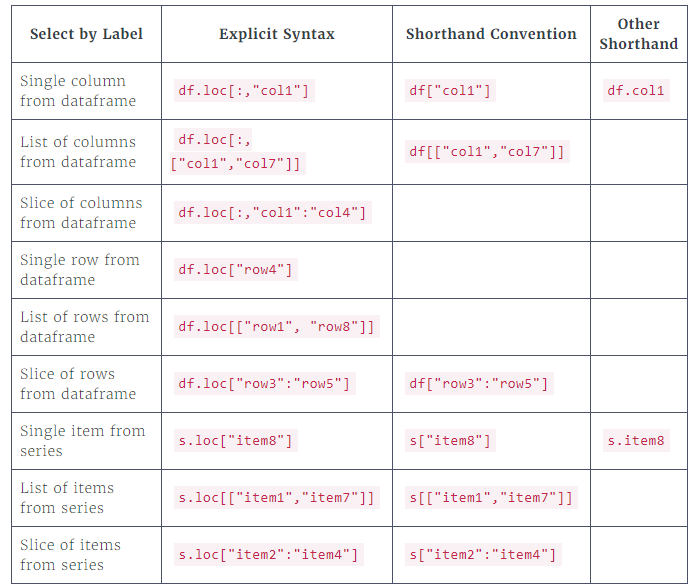

#  Pandas data selection using integer positions<br>
-   methods DataFrame.iloc[]  Series.iloc[]
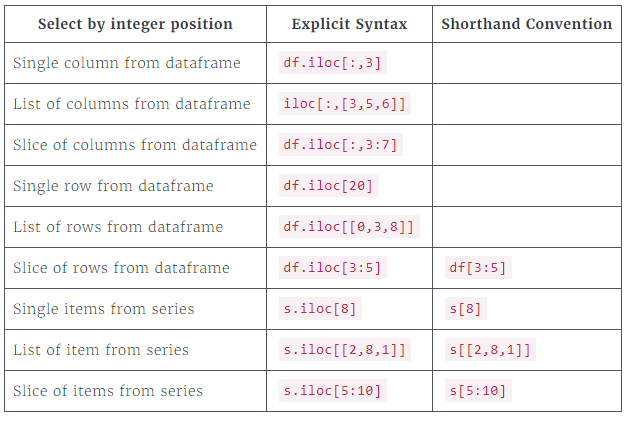


# Pandas methods

-  __.describe()__ <br>

both DataFrame and Series have .describe() methods. They are different but with the same name.<br>
DataFrame.describe() default on numeric values. <br>
DataFrame.describe(include=['0']) for non-numeric values.<br>

In [ ]:
print(f500["assets"].describe())    # Series.describe()  on numeric values
print(f500["country"].describe())   # Series.describe()  on non-numeric values
print(f500.describe(include=['O'])) # only show the info for non-numeric values

profits_desc = f500['profits'].describe() 
revenue_and_employees_desc = f500[['revenues','employees']].describe()
all_desc = f500.describe(include ='all')

-  __other methods__

In [ ]:
Series.max() and DataFrame.max()      # for only the numeric columns: numeric_only =True
Series.min() and DataFrame.min() 
Series.mean() and DataFrame.mean() 
Series.median() and DataFrame.median()   #  default axis =0 
Series.mode() and DataFrame.mode()
Series.sum() and DataFrame.sum()

-  __Series.value_count()__ <br> 
is one of the handiest methods to use when exploring a data set. doesn't have a dataframe counterpart.

In [9]:
top5_countries = f500['country'].value_counts().head()
top5_previous_rank = f500['previous_rank'].value_counts().head()
max_f500 = f500.max(numeric_only=True)
print(top5_previous_rank)
print(type(top5_countries))

0      33
159     1
147     1
148     1
149     1
Name: previous_rank, dtype: int64
<class 'pandas.core.series.Series'>


-  __.sort_values(column,ascending = True/False)__

In [ ]:
sorted_emp = f500.sort_values("employees", ascending=False)

-  __Series.str.contains()__ , __Series.str.endswith()__, and __Series.str.startswith()__  

In [39]:
# find the first 5 companies that headquartered in CA,USA.

usa = f500[f500['country']=='USA']              # rows with country==USA                      

bool = usa['hq_location'].str.endswith('CA')    # bool(USA column end with CA is True)
                                                # A boolean Series: the values in (hq_location column + usa rows) end with 'CA'

california = usa.loc[bool]                      # (rows with country=USA).loc[bool(vaues(USArows+ hqcolumns) end with 'CA' is True)]

print(california.iloc[:5,:3])                   # print the first 5 companies with their first 3 columns. 

# In one line:  california = f500[f500['country']=='USA'].loc[f500[f500['country']=='USA']['hq_location'].str.endswith('CA')]

             rank  revenues  revenue_change
Apple           9    215639            -7.7
McKesson       11    198533             3.1
Chevron        45    107567           -18.0
Wells Fargo    61     94176             4.6
Alphabet       65     90272            20.4


-  __Series.isnull()__ and __Series.notnull()__

In [41]:
previously_ranked = f500[f500['previous_rank'].notnull()]        # all the rows with previous_rank is not null
rank_change = previously_ranked['rank']-previously_ranked['previous_rank']    # a Series shows the rank change value, current_rank - previous_rank
print(rank_change[:4])

Walmart                     0.0
State Grid                  0.0
Sinopec Group              -1.0
China National Petroleum    1.0
dtype: float64


# Assign values in Pandas
The results above shows that there are 33 companies with previous rank'0'. Since we don't have '0' as a rank value, these values shoud be 'np.nan' instead of '0'. We need to assign new values to the 'o' cells.<br>
If we assign a value using a index or column label that does not exist, pandas will create a new row or column in our dataframe.

In [5]:
f500['revenues_b'] = f500['revenues']/1000            # create a new column that is 1/1000 of the values in 'revenues' 
f500.loc['Dow Chemical','ceo'] = 'Jim Fitterling'     # note: f500.loc[row,column]  not f500[row,column]

In [13]:
# Use boolean indexing to replace the '0' values in the unknown rows.
# we want to specify both axes, we used loc[].

import numpy as np                                                          # when using nan value in Pandas, need to import numpy.

top_5_kr = f500.loc[f500['country']=='South Korea'].head()                  # the first 5 ROWS
f500.loc[f500['previous_rank']==0,'previous_rank'] = np.nan                 # np.nan
prev_rank_after = f500["previous_rank"].value_counts(dropna=False).head()   # .value_counts(dropna=False) no exclude the nan values.
print(prev_rank_after)  

# the rank values below became float values from the previous integer values.
# This is because that Pandas used numpy integer values which does not has NaN. 
# When including NaN, Pandas needs to convert the integers into float

NaN       33
 471.0     1
 234.0     1
 125.0     1
 166.0     1
Name: previous_rank, dtype: int64


# Explore the data of the top 3 most common countries
-  What are the five most common Headquarter Location cities for companies headquartered in the USA?
-  What are the three most common sectors for companies headquartered in the China?
-  What is the mean average number of employees for companies headquartered in Japan?

In [17]:
top_3_countries = f500['country'].value_counts().head(3)  # the top 3 most common countries int he data set.
print(top_3_countries)

USA      132
China    109
Japan     51
Name: country, dtype: int64


In [24]:
# What are the five most common Headquarter cities in USA?
cities_usa = f500.hq_location[f500['country']=='USA'].value_counts().head()   # type(DataFrame.columnlabel) == Series 
print(cities_usa)
print(f500.hq_location.head())
print(type(f500.hq_location))

Walmart                     Bentonville, AR
State Grid                   Beijing, China
Sinopec Group                Beijing, China
China National Petroleum     Beijing, China
Toyota Motor                  Toyota, Japan
Name: hq_location, dtype: object
<class 'pandas.core.series.Series'>


In [26]:
# What are the three most common sectors for companies headquartered in the China?
sector_china = f500.sector[f500['country']=='China'].value_counts().head(3)
print(sector_china)

Financials     25
Energy         22
Wholesalers     9
Name: sector, dtype: int64


In [28]:
# What is the mean average number of employees for companies headquartered in Japan?
mean_employees_japan = f500.employees[f500['country']=='Japan'].mean()
print(mean_employees_japan)

104564.45098039215


# Boolean operators
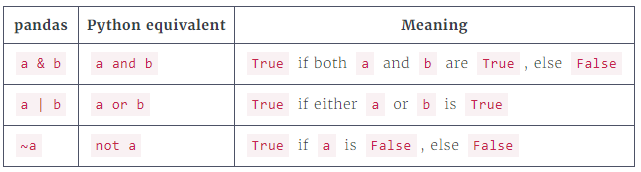

In [47]:
# Companies with revenues over 100 billion and negative profits
big_rev_neg_profit = f500.loc[(f500['revenues']>100000)&(f500['profits']<0)]

# The first 5 companies in the Technology sector that are not headquartered in the USA
tech_outside_usa = f500[(f500['sector']=='Technology')&~(f500['country']=='USA')]

print(big_rev_neg_profit.iloc[:,:3], tech_outside_usa.iloc[:5,:3])

                     rank  revenues  revenue_change
Japan Post Holdings    33    122990             3.6
Chevron                45    107567           -18.0                              rank  revenues  revenue_change
Samsung Electronics            15    173957            -2.0
Hon Hai Precision Industry     27    135129            -4.3
Hitachi                        71     84558             1.2
Huawei Investment & Holding    83     78511            24.9
Sony                          105     70170             3.9


# Senarios that needs to use loops in Pandas
__Problems to solve__:<br>
-  What is the average revenue for all the companies in each country?
-  WHat is the compnay employs the most people in each country? How many employees?
-  What is the compnay that has the highest ROA(return on assets) in each sector?

__ Common Methods__:<br>
-  Series.unique() <br>
-  DataFrame.sort_values() <br>

__The logic to solve such problems:__<br>
1. Create a target dict
2. Create a Series of unique values according to the key word 'each XXX' 
3. Loop thourgh the Series: 
    1. Make a new df: with only rows containing the iterable
    2. Make a modified new df:
        1. if calculation: df[feature column].calculation<br>
           target_dict[iterable] = calculation result
        2. if alteration(sort): make an altered new df by sorting through the feature column<br>
           target_value = altered_newdf[target column][certain value]<br>
           target_dict[iterable] = target_value


In [61]:
# find the average revenue in each country

country_revenue ={}
country = f500['country'].unique()
for i in country:
    average_revenue = f500[f500['country']==i]['revenues'].mean()
    country_revenue[i]=average_revenue
print(country_revenue)

#  f500.loc[f500['country']=='USA','revenues'] ==  f500[f500['country']=='USA']['revenues']

{'USA': 64218.371212121216, 'China': 55397.880733944956, 'Japan': 53164.03921568627, 'Germany': 63915.0, 'Netherlands': 61708.92857142857, 'Britain': 51588.708333333336, 'South Korea': 49725.6, 'Switzerland': 51353.57142857143, 'France': 55231.793103448275, 'Taiwan': 46364.666666666664, 'Singapore': 54454.333333333336, 'Italy': 51899.57142857143, 'Russia': 65247.75, 'Spain': 40600.666666666664, 'Brazil': 52024.57142857143, 'Mexico': 54987.5, 'Luxembourg': 56791.0, 'India': 39993.0, 'Malaysia': 49479.0, 'Thailand': 48719.0, 'Australia': 33688.71428571428, 'Belgium': 45905.0, 'Norway': 45873.0, 'Canada': 31848.0, 'Ireland': 32819.5, 'Indonesia': 36487.0, 'Denmark': 35464.0, 'Saudi Arabia': 35421.0, 'Sweden': 27963.666666666668, 'Finland': 26113.0, 'Venezuela': 24403.0, 'Turkey': 23456.0, 'U.A.E': 22799.0, 'Israel': 21903.0}


In [37]:
# find the company which employs the most people in each country and list the number of employees.

top_employer_by_country = {}
countries = f500["country"].unique()
for c in countries:
    selected_rows = f500[f500["country"] == c]
    sorted_rows = selected_rows.sort_values("employees", ascending = False)
    top_company = sorted_rows['company'].iloc[0]     # because the rows are altered from the original data set, we need to use .iloc[]
                                                     # we can use 'company' as culumn name because when the file was read, there was no "index_col =0"
                                                     # if there is, we need to use here : top_company = sorted_rows.index[0]
 
    employee_number = sorted_rows['employees'].iloc[0]   # the numbers are inte64 type, need to convert to string for printing.
    top_employer_by_country[c] = top_company + " " + str(employee_number)  
    
print(top_employer_by_country)

{'USA': 'Walmart 2300000', 'China': 'China National Petroleum 1512048', 'Japan': 'Toyota Motor 364445', 'Germany': 'Volkswagen 626715', 'Netherlands': 'EXOR Group 302562', 'Britain': 'Compass Group 527180', 'South Korea': 'Samsung Electronics 325000', 'Switzerland': 'Nestle 328000', 'France': 'Sodexo 425594', 'Taiwan': 'Hon Hai Precision Industry 726772', 'Singapore': 'Flex 200000', 'Italy': 'Poste Italiane 136739', 'Russia': 'Gazprom 467400', 'Spain': 'Banco Santander 185606', 'Brazil': 'JBS 237061', 'Mexico': 'America Movil 194193', 'Luxembourg': 'ArcelorMittal 198517', 'India': 'State Bank of India 278872', 'Malaysia': 'Petronas 51034', 'Thailand': 'PTT 24934', 'Australia': 'Wesfarmers 220000', 'Belgium': 'Anheuser-Busch InBev 206633', 'Norway': 'Statoil 20539', 'Canada': 'George Weston 195000', 'Ireland': 'Accenture 384000', 'Indonesia': 'Pertamina 27227', 'Denmark': 'Maersk Group 87736', 'Saudi Arabia': 'SABIC 35000', 'Sweden': 'H & M Hennes & Mauritz 114586', 'Finland': 'Nokia 10

In [39]:
# find the compnay that has the highest ROA(return on assets) in each sector

sector_highROA = {}
sectors = f500['sector'].unique()
f500['roa'] = f500['profits']/f500['assets']            # a new column 'roa'

for s in sectors:
    sorted_rows = f500[f500['sector']== s].sort_values('roa', ascending = False)
    highest_roa = sorted_rows['company'].iloc[0]
    sector_highROA[s] = highest_roa
    
print(sector_highROA)

{'Retailing': 'H & M Hennes & Mauritz', 'Energy': 'National Grid', 'Motor Vehicles & Parts': 'Subaru', 'Financials': 'Berkshire Hathaway', 'Technology': 'Accenture', 'Wholesalers': 'McKesson', 'Health Care': 'Gilead Sciences', 'Telecommunications': 'KDDI', 'Engineering & Construction': 'Pacific Construction Group', 'Industrials': '3M', 'Food & Drug Stores': 'Publix Super Markets', 'Aerospace & Defense': 'Lockheed Martin', 'Food, Beverages & Tobacco': 'Philip Morris International', 'Household Products': 'Unilever', 'Transportation': 'Delta Air Lines', 'Materials': 'CRH', 'Chemicals': 'LyondellBasell Industries', 'Media': 'Disney', 'Apparel': 'Nike', 'Hotels, Restaurants & Leisure': 'McDonald’s', 'Business Services': 'Adecco Group'}
